In [1]:
import numpy as np
from scipy import signal
from numpy import linalg as LA
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

In [2]:
fs, x = wavfile.read('vl1.wav')
x = (x/np.max(x)).astype(float)
window = 'hamming'
nperseg = 1024
noverlap = int(1024 * 3/4)

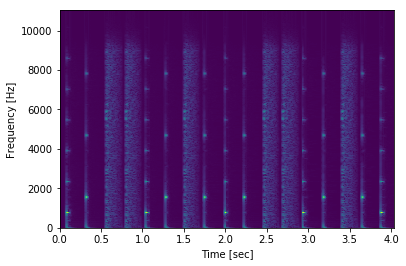

In [3]:
f, t, Zxx = signal.stft(x=x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
X = abs(Zxx)
plt.pcolormesh(t, f, np.sqrt(X))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# PCA

In [4]:
X_mean = np.mean(X, axis=1)
X_norm = X-X_mean[:,None]
X_cov = (X_norm @ X_norm.T)/len(t)
w, v = LA.eig(X_cov)
w_inverse_sqrt = (w**(-1/2)).astype(float)
w_inverse_sqrt = np.diag(w_inverse_sqrt)
v = v.astype(float)
Wpca = w_inverse_sqrt @ v.T

/Users/stevenchan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/Users/stevenchan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


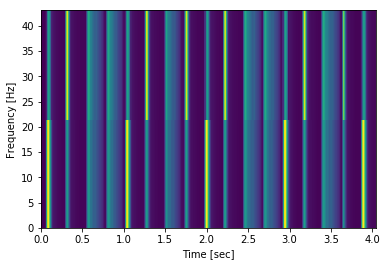

In [5]:
Zpca = Wpca @ X
plt.pcolormesh(t, f[0:3], np.sqrt(abs(Zpca[0:3])))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

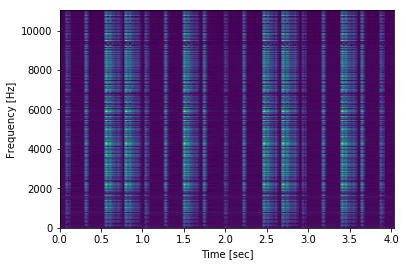

In [6]:
Xpca = LA.inv(Wpca) @ Zpca
Xpca += X_mean[:, None]
plt.pcolormesh(t, f, np.sqrt(abs(Xpca)))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# ICA

In [7]:
Z3 = Zpca[0:3]
W3 = np.random.random_sample((3,3))
steps = 500
batch_size = 10
lr = 1e-3
for step in range(steps):
    rand_idx = np.random.randint(low=0, high=len(t), size=10)
    batch = Z3[:, rand_idx]
    fn = 2 * np.tanh(batch)
    batch_T = batch.T
    Niden = batch_size * np.eye(3)
    W3 += lr * (Niden - fn @ batch_T) @ W3

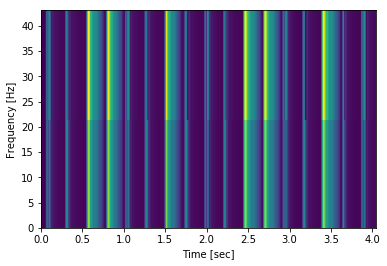

In [8]:
Zica = LA.inv(W3) @ Z3
plt.pcolormesh(t, f[0:3], np.sqrt(abs(Zica)))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

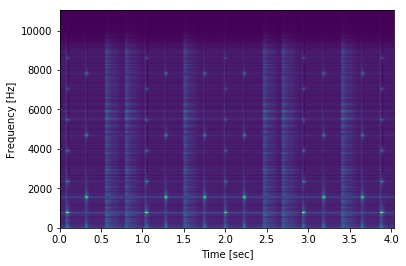

In [9]:
Xica = LA.pinv(LA.inv(W3) @ Wpca[0:3]) @ Zica
Xica += X_mean[:, None]
plt.pcolormesh(t, f, np.sqrt(abs(Xica)))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()